dict_keys(['__header__', '__version__', '__globals__', 'sym', 'src', 'received', 'parity_fb', 'parity_all', 'combined_noise_par', 'err_list', 'err_val_list', 'err_per_round'])
(100000, 1)
(100000, 1, 9)
(100000, 1, 9)
(100000, 1, 9)
(12430,)
(12430, 9)
(12430, 9)
(12430, 9)
coeff for round 1: [0.]


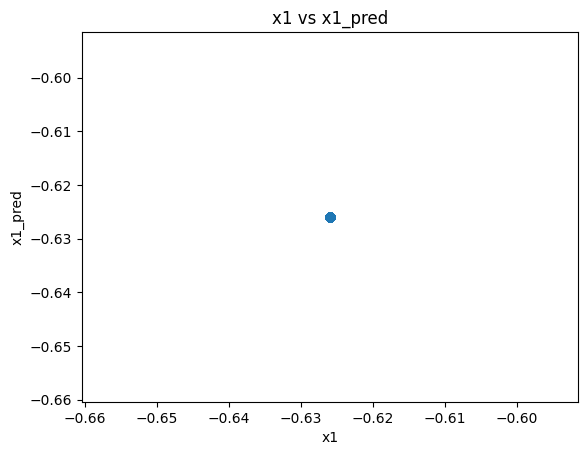

[1 1 1 ... 1 1 1]
[-0.62594926 -0.62594926 -0.62594926 ... -0.62594926 -0.62594926
 -0.62594926]
[-0.62594926 -0.62594926 -0.62594926 ... -0.62594926 -0.62594926
 -0.62594926]
(12430, 1)
(12430, 1)
[ 0.00077375 -0.7382308 ]
-0.4502545
0.994560933966489
[array([ 0.00077375, -0.7382308 ], dtype=float32)]
[-0.4502545]
(12430, 2)
(12430, 2)
[ 0.01877245 -0.6258969  -0.95371974 -0.73861766]
-0.5666677
0.9970387379386102
[array([ 0.00077375, -0.7382308 ], dtype=float32), array([ 0.01877245, -0.6258969 , -0.95371974, -0.73861766], dtype=float32)]
[-0.4502545, -0.5666677]
(12430, 3)
(12430, 3)
[ 0.03287699 -0.9398792  -0.605314   -1.3189065  -0.93784946 -0.73239917]
-0.78213936
0.9966138476168083
[array([ 0.00077375, -0.7382308 ], dtype=float32), array([ 0.01877245, -0.6258969 , -0.95371974, -0.73861766], dtype=float32), array([ 0.03287699, -0.9398792 , -0.605314  , -1.3189065 , -0.93784946,
       -0.73239917], dtype=float32)]
[-0.4502545, -0.5666677, -0.78213936]
(12430, 4)
(12430, 4)
[ 0.05

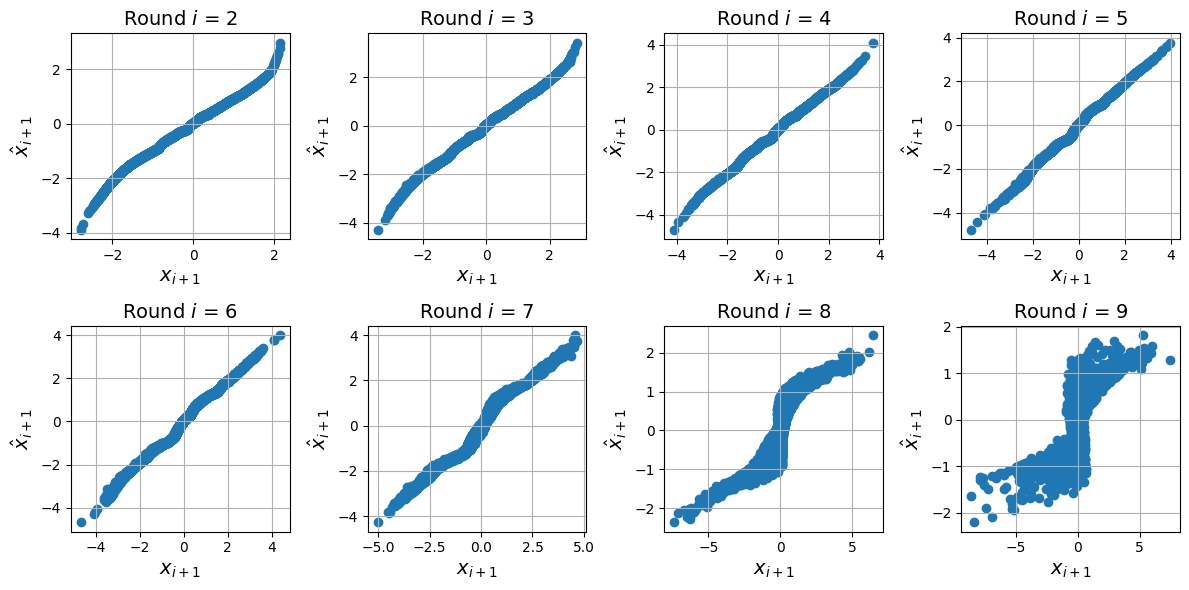

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.io import loadmat

data = loadmat('data/dbg_data_T_9_n_1000000.mat')

# print the keys of the dictionary
print(data.keys())

m = data['sym']
x = data['parity_all']
y = data['received']
n = data['combined_noise_par']

# print the shape of the arrays
print(m.shape)
print(x.shape)
print(y.shape)
print(n.shape)

# find indices where m is 2
idx = np.where(m == 1)

m = m[idx]
x = x[idx]
y = y[idx]
n = n[idx]

# print the shape of the arrays
print(m.shape)
print(x.shape)
print(y.shape)
print(n.shape)

n1 = n[:, 0]
x1 = x[:, 0]
x2 = x[:, 1]

# # plot x2 vs n1
# plt.scatter(n1, x2)
# plt.xlabel('n1')
# plt.ylabel('x2')
# plt.title('x2 vs n1')
# plt.show()

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

# linear regression: x1 vs m
lin = LinearRegression()
lin.fit(m.reshape(-1, 1), x1)

print(f"coeff for round 1: {lin.coef_}")

# plot preddiction vs actual
x1_pred = lin.predict(m.reshape(-1, 1))
plt.scatter(x1, x1_pred)
plt.xlabel('x1')
plt.ylabel('x1_pred')
plt.title('x1 vs x1_pred')
plt.show()

print(m)
print(x1)
print(x1_pred)


# linear regression: x2 vs n1
# lin = LinearRegression()
# lin.fit(n1.reshape(-1, 1), x2)
# lin.fit(np.column_stack((x1, n1)), x2)

# # plot preddiction vs actual
# x2_pred = lin.predict(np.column_stack((x1, n1)))
# plt.scatter(x2, x2_pred)
# plt.xlabel('x2')
# plt.ylabel('x2_pred')
# plt.title('x2 vs x2_pred')
# plt.show()


# x1 = x[:, 0]
# n1 = n[:, 0]
# x2 = x[:, 1]

# # print shapes of the arrays
# print(x1.shape)
# print(n1.shape)

# # linear regression: x2 vs x1,n1
# lin = LinearRegression()
# lin.fit(np.column_stack((x1, n1)), x2)

# # plot preddiction vs actual
# x2_pred = lin.predict(np.column_stack((x1, n1)))
# plt.scatter(x2, x2_pred)
# plt.xlabel('y')
# plt.ylabel('y_pred')
# plt.title('y vs y_pred')
# plt.show()

# save the coefficients
coeff = []
intercept = []

# 2x4 subplots
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

# # repeat the above for all xi
for i in range(1, 9):
    xi = x[:, :i]
    yi = y[:, :i]
    ni = n[:, :i]
    print(xi.shape)
    print(yi.shape)
    
    x_target = x[:, i]
    lin = LinearRegression()
    lin.fit(np.column_stack((xi, ni)), x_target)
    x_pred = lin.predict(np.column_stack((xi, ni)))
    # plt.scatter(x_target, x_pred)
    # plt.xlabel(r'$x_{i+1}$', fontsize=14)
    # plt.ylabel(r'$\hat{x}_{i+1}$', fontsize=14)
    # plt.title(f'Linear round {i+1} x_target vs x_pred')
    # plt.show()

    # Add the plots to the subplots
    t = i-1
    # ensure square subplots
    # ax[t//4, t%4].set_aspect('equal')
    
    # find x limits
    x_min = np.min(x_target)
    x_max = np.max(x_target)
    # set y limits same as x limits
    # ax[t//4, t%4].set_ylim(x_min, x_max)
    

    
    ax[t//4, t%4].scatter(x_target, x_pred)
    ax[t//4, t%4].set_xlabel(r'$x_{i+1}$', fontsize=14)
    ax[t//4, t%4].set_ylabel(r'$\hat{x}_{i+1}$', fontsize=14)
    ax[t//4, t%4].set_title(f'Round $i$ = {i+1}', fontsize=14)
    
    # add grid
    ax[t//4, t%4].grid()
    
    
    

    # print the coefficients
    print(lin.coef_)
    print(lin.intercept_)
    print(lin.score(np.column_stack((xi, ni)), x_target))
    
    # save the coefficients as a list
    lin_coeff = lin.coef_
    
    
    
    coeff.append(lin.coef_)
    intercept.append(lin.intercept_)
    print(coeff)
    print(intercept)
    
    # equantion to calculate the x_pred
    x_pred = lin.intercept_ + lin.coef_[0] * xi + lin.coef_[1] * yi
    
    

# show the subplots
plt.tight_layout()
plt.show()


# save all the linear coefficients to a list
coeff = np.array(coeff)
intercept = np.array(intercept)

# print(f"Linear coefficients: {coeff}")
# print(f"Linear intercept: {intercept}")

# # repeat the above for polynomial regression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error

# for i in range(1, 8):
#     xi = x[:, :i]
#     ni = n[:, :i]
    
#     print(xi.shape)
#     print(ni.shape)
    
#     x_target = x[:, i]
#     poly = PolynomialFeatures(degree=3)
#     xi_poly = poly.fit_transform(xi)
#     ni_poly = poly.fit_transform(ni)
#     lin = LinearRegression()
#     lin.fit(np.column_stack((xi_poly, ni_poly)), x_target)
#     x_pred = lin.predict(np.column_stack((xi_poly, ni_poly)))
#     plt.scatter(x_target, x_pred)
#     plt.xlabel('x_target')
#     plt.ylabel('x_pred')
#     plt.title(f'Poly round {i} x_target vs x_pred')
#     plt.show()

#     # print the coefficients
#     print(lin.coef_)
#     print(lin.intercept_)
#     print(lin.score(np.column_stack((xi_poly, ni_poly)), x_target))
#     print(mean_squared_error(x_target, x_pred))

